In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
#pd.options.display.max_rows = 100

In [266]:
elearning=pd.read_csv('Leads.csv')
#elearning.head()

In [267]:
elearning.shape

(9240, 37)

In [268]:
#Define function to get Meta-Data about any dataframe passed to the function
def get_data(dataframe) :
    data = pd.DataFrame({
            
                    'Total_Element': dataframe.count(), 
                    'Datatype' : dataframe.dtypes, 
                    'Null_Count': dataframe.isnull().sum(),
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100 
        
                       })
    return data

In [269]:
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.000000
Lead Number,9240,int64,0,0.000000
Lead Origin,9240,object,0,0.000000
Lead Source,9204,object,36,0.389610
Do Not Email,9240,object,0,0.000000
Do Not Call,9240,object,0,0.000000
Converted,9240,int64,0,0.000000
TotalVisits,9103,float64,137,1.482684
Total Time Spent on Website,9240,int64,0,0.000000
Page Views Per Visit,9103,float64,137,1.482684


In [270]:
features_list_1 =['Lead Origin', 'Lead Source', 'Last Activity', 'Country','City', 'Specialization',
                  'How did you hear about X Education', 'What is your current occupation', 
                  'What matters most to you in choosing a course']
for feature in features_list_1:
    print(feature,"\n",elearning[feature].value_counts(), end='\n\n')

Lead Origin 
 Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Lead Source 
 Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

Last Activity 
 Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428

In [271]:
#elearning.head()

In [272]:
features_list_2=['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Magazine', 'Newspaper Article', 
                 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                 'Receive More Updates About Our Courses', 'Lead Quality','Update me on Supply Chain Content',
                 'Get updates on DM Content','Lead Profile']
for feature in features_list_2:
    print(feature,"\n",elearning[feature].value_counts(), end='\n\n')

Do Not Email 
 No     8506
Yes     734
Name: Do Not Email, dtype: int64

Do Not Call 
 No     9238
Yes       2
Name: Do Not Call, dtype: int64

Converted 
 0    5679
1    3561
Name: Converted, dtype: int64

Search 
 No     9226
Yes      14
Name: Search, dtype: int64

Magazine 
 No    9240
Name: Magazine, dtype: int64

Newspaper Article 
 No     9238
Yes       2
Name: Newspaper Article, dtype: int64

X Education Forums 
 No     9239
Yes       1
Name: X Education Forums, dtype: int64

Newspaper 
 No     9239
Yes       1
Name: Newspaper, dtype: int64

Digital Advertisement 
 No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Through Recommendations 
 No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Receive More Updates About Our Courses 
 No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Lead Quality 
 Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Na

In [273]:
len(features_list_1)

9

In [274]:
len(features_list_2)

15

In [275]:
elearning.shape

(9240, 37)

In [276]:
all_features=elearning.columns

In [277]:
remaining_features=all_features.difference(features_list_1).difference(features_list_2)
remaining_features

Index(['A free copy of Mastering The Interview', 'Asymmetrique Activity Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque', 'Last Notable Activity',
       'Lead Number', 'Page Views Per Visit', 'Prospect ID', 'Tags',
       'Total Time Spent on Website', 'TotalVisits'],
      dtype='object')

In [278]:
#COnverting Select to null values in  the following columns
#Lead Profile 
# How did you hear about X Education 
# Specialization
# City


elearning['Lead Profile']=elearning['Lead Profile'].replace('Select', np.nan)
elearning['How did you hear about X Education']=elearning['How did you hear about X Education'].replace('Select', np.nan)
elearning['Specialization']=elearning['Specialization'].replace('Select', np.nan)
elearning['City']=elearning['City'].replace('Select',np.nan)
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [279]:
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.000000
Lead Number,9240,int64,0,0.000000
Lead Origin,9240,object,0,0.000000
Lead Source,9204,object,36,0.389610
Do Not Email,9240,object,0,0.000000
Do Not Call,9240,object,0,0.000000
Converted,9240,int64,0,0.000000
TotalVisits,9103,float64,137,1.482684
Total Time Spent on Website,9240,int64,0,0.000000
Page Views Per Visit,9103,float64,137,1.482684


In [280]:
#dropping the columns with 40% null values

elearning= elearning.loc[:, (elearning.isin([' ','NULL']) | elearning.isnull()).mean() <= .40]
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.000000
Lead Number,9240,int64,0,0.000000
Lead Origin,9240,object,0,0.000000
Lead Source,9204,object,36,0.389610
Do Not Email,9240,object,0,0.000000
Do Not Call,9240,object,0,0.000000
Converted,9240,int64,0,0.000000
TotalVisits,9103,float64,137,1.482684
Total Time Spent on Website,9240,int64,0,0.000000
Page Views Per Visit,9103,float64,137,1.482684


In [281]:
elearning.shape

(9240, 30)

In [282]:
#let's decide how to impute the null values in categorical columns

#1. Lead Source

elearning['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

In [283]:
elearning['Lead Source']=elearning['Lead Source'].replace('google','Google')
elearning['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
youtubechannel          1
WeLearn                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

In [284]:
#Replacing null values with mode Google and combining some categories 

elearning['Lead Source'].isnull().sum()


36

In [285]:
elearning['Lead Source']=elearning['Lead Source'].replace(np.nan, 'Google')
elearning['Lead Source'].isnull().sum()

0

In [286]:
#combining some categories in LEad Source
elearning['Lead Source']=elearning['Lead Source'].apply(lambda x: x if (x=='Google') | (x=='Direct Traffic') | 
                                                        (x=='Olark Chat') | (x=='Organic Search') else 'Others')
elearning['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             879
Name: Lead Source, dtype: int64

In [287]:
#2. imputing null values for TotalVisits
elearning['TotalVisits'].head()

0    0.0
1    5.0
2    2.0
3    1.0
4    2.0
Name: TotalVisits, dtype: float64

In [288]:
elearning['TotalVisits'].describe()
elearning['TotalVisits'].median()

3.0

In [289]:
elearning['TotalVisits']=elearning['TotalVisits'].replace(np.nan,elearning['TotalVisits'].median())
elearning['TotalVisits'].isnull().sum()

0

In [290]:
#imputing Page Views Per Visit 
elearning['Page Views Per Visit']=elearning['Page Views Per Visit'].replace(np.nan,elearning['Page Views Per Visit'].median())
elearning['Page Views Per Visit'].isnull().sum()

0

In [291]:
#imputing null values for Last Activity
elearning['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [292]:
elearning['Last Activity']=elearning['Last Activity'].replace(np.nan, 'Email Opened')
elearning['Last Activity'].isnull().sum()

0

In [293]:
elearning['Last Activity']=elearning['Last Activity'].apply(lambda x: x if (x=='Email Opened') |
                                                            (x=='SMS Sent') | 
                                                        (x=='Olark Chat Conversation') | (x=='Page Visited on Website') 
                                                            | (x=='Converted to Lead') | (x=='Email Bounced')
                                                            | (x=='Email Link Clicked') | (x=='Form Submitted on Website')
                                                            | (x=='Unreachable') | (x=='Unsubscribed')
                                                            else 'Others')
elearning['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

In [294]:
# imputing null values for Country
elearning['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
South Africa               4
Germany                    4
Kuwait                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Ghana                      2
Uganda                     2
Netherlands                2
Italy                      2
Belgium                    2
Philippines                2
Indonesia                  1
Tanzania                   1
Malaysia                   1
Switzerland                1
Sri Lanka                  1
Liberia                    1
Vietnam       

In [295]:
elearning['Country']=elearning['Country'].replace(np.nan,'India')
elearning['Country'].isnull().sum()

0

In [296]:
elearning['Country']=elearning['Country'].apply(lambda x: x if x=='India' else 'Others')
elearning['Country'].value_counts()

India     8953
Others     287
Name: Country, dtype: int64

In [297]:
#imptuing null values for Specialization
elearning['Specialization'].isnull().sum()

3380

In [298]:
elearning['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [299]:
#since the count of null values is very high and if the null values are imputed with mode then it will give highly skewed results
#so dropping the column
elearning=elearning.drop('Specialization',axis=1)
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [300]:
#imputing null values for What is your current occupation

elearning['What is your current occupation'].isnull().sum()

2690

In [301]:
elearning['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [302]:
elearning['What is your current occupation']=elearning['What is your current occupation'].replace(np.nan,'Unemployed')
elearning['What is your current occupation'].isnull().sum()

0

In [303]:
elearning['What is your current occupation']=elearning['What is your current occupation'].apply(
    lambda x: x if (x=='Unemployed') | (x=='Working Professional') | (x=='Student') else 'Others')
elearning['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Others                    34
Name: What is your current occupation, dtype: int64

In [304]:
#imputing null values for What matters most to you in choosing a course

elearning['What matters most to you in choosing a course'].isnull().sum()

2709

In [305]:
elearning['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [306]:
#This column has only one major value. It will not provide any insight into the model. Hence dropping it
elearning=elearning.drop('What matters most to you in choosing a course',axis=1)
elearning.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [307]:
#imputing null columns for column Tags
elearning['Tags'].isnull().sum()

3353

In [308]:
elearning['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [309]:
#since null value count is greater than mode hence dropping the column
elearning=elearning.drop('Tags',axis=1)
elearning.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [310]:
#imputing null values for City
elearning['City'].isnull().sum()

3669

In [311]:
elearning['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [312]:
#as null value counts is greater than mode hence dropping this column
elearning=elearning.drop('City',axis=1)
elearning.shape

(9240, 26)

In [313]:
get_data(elearning)

,Total_Element,Datatype,Null_Count,Null_Percentage
Prospect ID,9240,object,0,0.0
Lead Number,9240,int64,0,0.0
Lead Origin,9240,object,0,0.0
Lead Source,9240,object,0,0.0
Do Not Email,9240,object,0,0.0
Do Not Call,9240,object,0,0.0
Converted,9240,int64,0,0.0
TotalVisits,9240,float64,0,0.0
Total Time Spent on Website,9240,int64,0,0.0
Page Views Per Visit,9240,float64,0,0.0


In [314]:
elearning.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


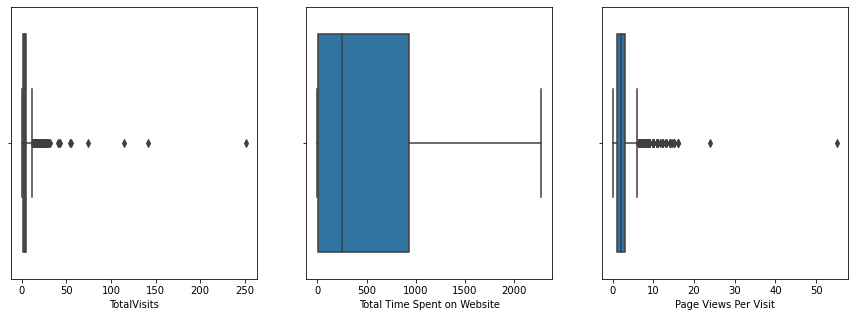

In [315]:

attributes=['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
row = 1
col = 3
i = 0
plt.figure(figsize=[15,5])

for a in attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.boxplot(elearning[a])

plt.show()

In [316]:
elearning.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


In [317]:
for a in attributes:
    Q1 = elearning[a].quantile(0.99)
    elearning[a][elearning[a] > Q1] = Q1

In [320]:
elearning.describe(percentiles=[.25,.5,.75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.327814,486.510793,2.329050
std,23405.995698,0.486714,3.228466,544.845436,1.971347
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
99%,659592.980000,1.000000,17.000000,1840.372100,9.000000
max,660737.000000,1.000000,17.000000,1840.610000,9.000000


In [319]:
elearning.shape

(9240, 26)

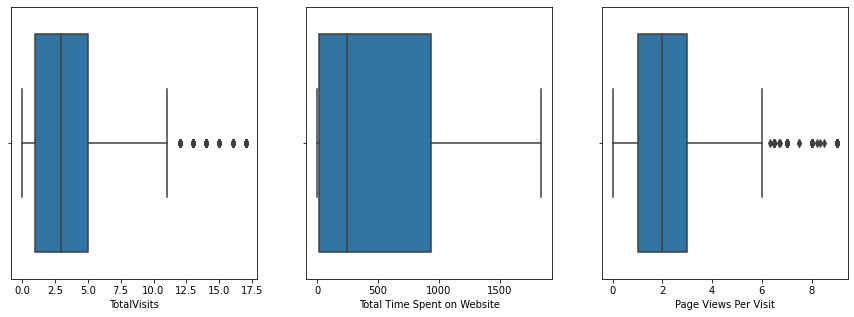

In [321]:

row = 1
col = 3
i = 0
plt.figure(figsize=[15,5])

for a in attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.boxplot(elearning[a])

plt.show()

In [322]:
# Determine the percentage of data retained

num_data = round(100*(len(elearning)/9240),2)
print(num_data)

100.0


In [323]:
elearning.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,India,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,India,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


# Univariate analysis